#TP 7 - CNN

## 1) Chargement et mise en forme des données

ERROR! Session/line number was not unique in database. History logging moved to new session 59


Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


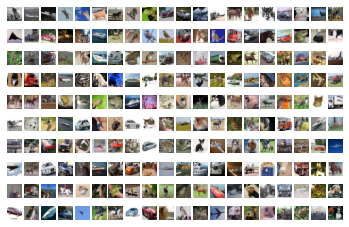

In [1]:
# Import libraries and modules
import time
import numpy as np
np.random.seed(123)  # for reproducibility

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D, Input

# I -Load pre-shuffled MNIST data train and test sets

(X_train, y_train), (X_test, y_test) = cifar10.load_data()#Ne conserve que 10% de la base
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9)
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9)

for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(X_train[i,:].reshape([32,32,3]), cmap='gray')
  plt.axis('off')
plt.show()

# Preprocess input data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10) #Converts a class vector (integers) to binary class matrix.
Y_test = np_utils.to_categorical(y_test, 10)

**Que realise toutes ces lignes de code ?**
---
---
 L'ensemble de données CIFAR-10 est une collection d'images couramment utilisées pour former des algorithmes d'apprentissage automatique et de vision par ordinateur. 
---
( The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. )
---

On ne prend que 10% de la base qui est amplement suffisante puis on construit nos bases de train et test.
---
On fait attention que les input datas correspondent a une valeur entre 0 et 1 en les divisant par le max qu'ils peuvent atteindre.
---
Input to categorical - > converts a class vector (integers) to binary class matrix. for our datas to be 1 and 0s.
---



In [4]:
print(np.shape(X_train))
print(np.shape(X_test))

(5000, 32, 32, 3)
(1000, 32, 32, 3)


**Combien y a-t-ild’images dans la base de test ? Dans la base d’apprentissage? Quelle est la taille des images? Combien y a-t-il de classes?**
---
---
Il y a 6000 images, 5000 en train et 1000 en test. Elles font toutes 32 pixels par 32 pixels et le trois correspond aux couleurs RGB

In [5]:
print(np.shape(Y_train))
print(np.shape(Y_test))

(5000, 10)
(1000, 10)


Il y a une taille de 6000 en sortie avec 5000 pour Y train et 1000 pour Ytest et de dimensions 10 représentant la matrice binaire

## 2 Regression logistique
---
### 1. Définition du reseau

In [43]:
# Define model architecture
inputs = Input(shape=(32,32,3)) 
x = inputs 
x=Flatten()(x) 
outputs=Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


Questions
---
***Pourquoi utilise-t-on la fonction d’activation softmax ?***
* On associe à chaque possibilité de sortie un score, que l'on transforme en probabilité avec la fonction softmax.  : on associe à chaque possibilité de sortie un score, que l'on transforme en probabilité avec la fonction softmax.
-
Concrètement, on a en entrée un vecteur, qui est donc une matrice colonne, notée x, de N lignes. On va la multiplier par une matrice dite « de poids » W de T lignes et de N colonnes, afin de transformer x en un vecteur de T éléments (appelés logits). 
-
 La fonction softmax est utilisée pour ***transformer les logits dans un vecteur de probabilités, indiquant la probabilité que x appartienne à chacune des classes de sortie T. *** 
---
![Texte alternatif…](https://www.researchgate.net/profile/Shen_Leixian/publication/325856086/figure/fig1/AS:723221292789765@1549440801787/Softmax-function-image.png)



**Que représente 10 sur la ligne outputs=Dense(10, activation='softmax')(x) ? Aurait-on pu utiliser une autre valeur ?**
---
* le 10 représente le shape des inputs qu'on va mettre dans Dense. Ici, il correspond à notre sortie Ytrain donc on pourrait le changer si tant est qu'on change le nombre de classe que l'on veut
-> les 10 vont correspondre aux 10 classes distinctes
---
**A quoi sert la commande Flatten ?**
---
* Return a copy of the array collapsed into one dimension. -> pour pouvoir les manipuler en tant que vecteurs 
---
**Combien y a-t-il de paramètres à apprendre (Trouver les par le calcul puis vérifier) ?**
---
* ENTREE : 32*32*3 ->3072 -> multiplié par 10 le nombre de neurones avec un seul biais par neurones donc 30730 params


###2. Apprentissage

In [0]:
def affiche(history): 
  # summarize history for accuracy 
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy']) 
  plt.title('model accuracy') 
  plt.ylabel('accuracy') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.grid()
  plt.show() 
  # summarize history for loss 
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model loss') 
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.grid()
  plt.show()

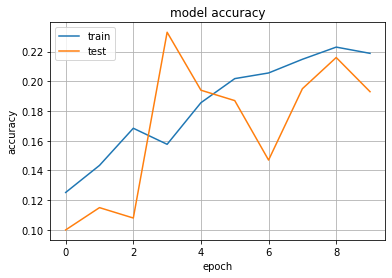

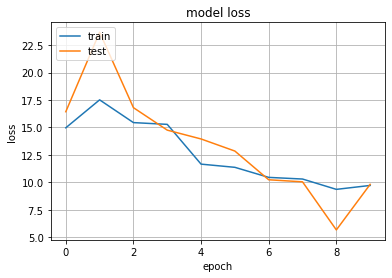

lr= 0.1 batch_size= 256 epochs= 10
Temps d apprentissage 2.482855999999998


In [44]:
lr=0.1 
batch_size=256 
epochs=10 
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
tps1 = time.clock() #on regarde le temps que ça tourne
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                   verbose=0,validation_data=(X_test, Y_test)) 
tps2 = time.clock()

affiche(history) 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

***Que représente lr, batch et epochs ?***
---
* lr: learning rate du gradient

* batch: Batch signifie que vous utilisez toutes vos données pour calculer le gradient au cours d'une itération.

* mini-batch : vous ne prenez qu'un sous-ensemble de toutes vos données au cours d'une itération. Ici 256 images

* epoch: Epoch signifie un passage sur le set d'entraînement complet
---
***Pourquoi utilise-t-on 'categorical_crossentropy’ comme fonction perte ?***
---
* Categorical crossentropy is a loss function that is used for single label categorization. This is when only one category is applicable for each data point. In other words, an example can belong to one class only.
* Use categorical crossentropy in classification problems where only one result can be correct. mais d'apres Remi Chalard, parce que c'est un probleme a K classes.
---
***Que réalise la fonction affiche(history) ? Est-ce que l’apprentissage se passe bien ? Le nombre d’epochs est-il suffisant ?***
---
* affiche(history) permet d'afficher en fonction des epoch le loss et l'accuracy
* l'accuracy ne dépasse pas les 0.4...On n'est pas vraiment très performant
---

###3. Evaluation du modele

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0) # verbose methode d'affichage 0 rien, 1 anim avec des barres
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=-1) 
print('Confusion Matrix') 
print(confusion_matrix(y_test, y_pred))

Test loss: 9.852727890014648
Test accuracy: 19.300000369548798
Confusion Matrix
[[40  0  0 48  1 17  0  1  0  1]
 [ 5  0  0 59  1 29  0  2  0  1]
 [ 9  0  0 71  7 18  0  0  0  0]
 [ 0  0  0 77  1 21  0  0  0  0]
 [ 3  0  0 69 12 26  0  0  0  0]
 [ 1  0  0 42  4 41  0  2  0  0]
 [ 0  0  0 73  8 19  0  0  0  0]
 [ 0  0  0 57  3 27  0 11  0  1]
 [23  0  0 49  0 24  0  0  3  3]
 [ 5  0  0 56  0 18  0  2  0  9]]


***Que renvoie model.predict et pourquoi utilise-t-on y_pred.argmax ?***
---
* Model_predict renvoie les données que le modele aura prédit sur X test
* y_pred.argmax : choisir la plus grande activation pour avoir la classification
---
***Refaire l’apprentissage en réglant au mieux les valeurs de lr, batch et epochs. Quel est le meilleur taux de reconnaissance obtenu ?***
---

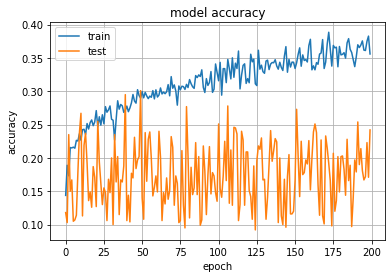

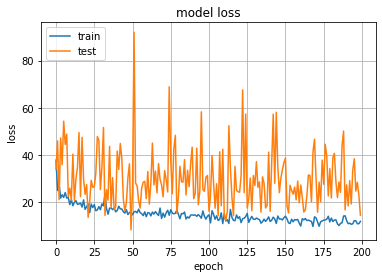

lr= 0.2 batch_size= 128 epochs= 200
Temps d apprentissage 46.08802


In [46]:
lr=0.2
batch_size=128 
epochs=200 
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
tps1 = time.clock() #on regarde le temps que ça tourne
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                   verbose=0,validation_data=(X_test, Y_test)) 
tps2 = time.clock()

affiche(history) 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0) # verbose methode d'affichage 0 rien, 1 anim avec des barres
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=-1) 
print('Confusion Matrix') 
print(confusion_matrix(y_test, y_pred))

Test loss: 32.75071716308594
Test accuracy: 16.200000047683716
Confusion Matrix
[[ 0 96  0  0  0  0  1 11  0  0]
 [ 0 80  0  0  0  0  1 16  0  0]
 [ 0 52  0  0  0  0 12 41  0  0]
 [ 0 66  0  0  0  0 11 22  0  0]
 [ 0 43  0  0  0  0 12 55  0  0]
 [ 0 43  0  0  0  0  9 38  0  0]
 [ 0 52  0  0  0  0 28 20  0  0]
 [ 0 45  0  0  0  0  1 53  0  0]
 [ 0 93  0  0  0  0  1  7  1  0]
 [ 0 77  0  0  0  0  2 11  0  0]]


##3) MLP

Reprendre toutes les questions précédentes en ajoutant une couche cachée à 128 neurones avec la fonction d’activation adéquate.

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


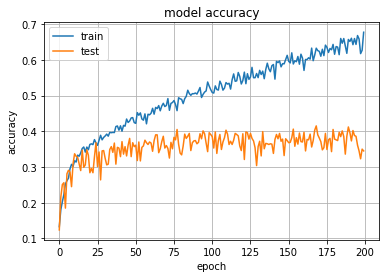

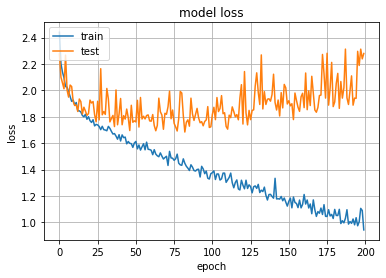

lr= 0.1 batch_size= 256 epochs= 200
Temps d apprentissage 91.21210300000001


In [53]:
# Define model architecture
inputs = Input(shape=(32,32,3)) 
x = inputs 
x=Flatten()(x) 
couche=Dense(128,activation='relu')(x)
outputs=Dense(10, activation='softmax')(couche) 
model = Model(inputs, outputs) 

model.summary()
lr=0.1 
batch_size=256 
epochs=200
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
tps1 = time.clock() #on regarde le temps que ça tourne
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                   verbose=0,validation_data=(X_test, Y_test)) 
tps2 = time.clock()

affiche(history) 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

***Que se passe-t-il si le pas d’apprentissage est trop grand ? Trop petit ?***
---
* le probleme des extremums locaux
[explications](https://developers.google.com/machine-learning/crash-course/reducing-loss/learning-rate?hl=fr://)
---
***Ajouter une couche de droupout, avec un paramètre de 0.5, entre les deux couches denses.***
---

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               393344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


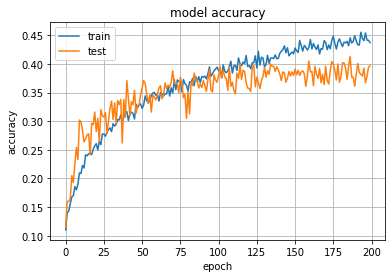

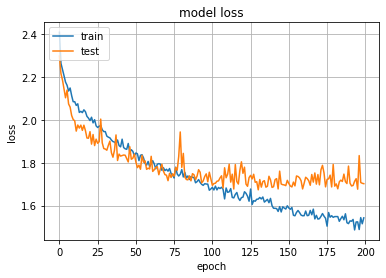

lr= 0.1 batch_size= 256 epochs= 200
Temps d apprentissage 93.911112


In [54]:
# Define model architecture
inputs = Input(shape=(32,32,3)) 
x = inputs 
x=Flatten()(x) 
couche=Dense(128,activation='relu')(x)
dropout=Dropout(0.5)(couche)
outputs=Dense(10, activation='softmax')(dropout) 
model = Model(inputs, outputs) 

model.summary()
lr=0.1 
batch_size=256 
epochs=200
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
tps1 = time.clock() #on regarde le temps que ça tourne
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                   verbose=0,validation_data=(X_test, Y_test)) 
tps2 = time.clock()

affiche(history) 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

Train et Test sont plus proches avec le dropout pour éviter le surapprentissage (0.5 pour dire que la moitié des neurones au hasard  vont etre desactives lors des epochs)

##4) CNN

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               209

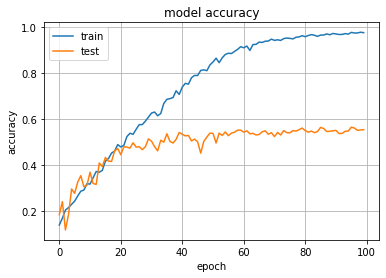

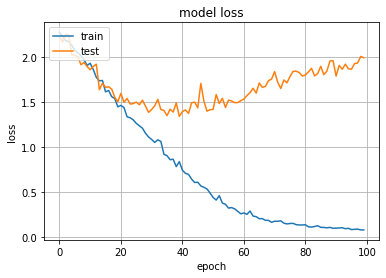

lr= 0.1 batch_size= 256 epochs= 100
Temps d apprentissage 4422.156616


In [60]:
# Define model architecture
inputs = Input(shape=(32,32,3)) 
x = inputs 
filtre32=Convolution2D(32,(3,3), activation='relu',padding='same')(x)
filtre64=Convolution2D(64,(3,3), activation='relu',padding='same')(filtre32)
dropout1=Dropout(0.25)(filtre64)
p= MaxPooling2D(pool_size=(2,2), strides=2,padding='same')(dropout1)
f=Flatten()(p) 

couche=Dense(128,activation='relu')(f)
dropout=Dropout(0.5)(couche)
outputs=Dense(10, activation='softmax')(dropout) 
model = Model(inputs, outputs) 

model.summary()
lr=0.1 
batch_size=512 
epochs=100
sgd1=SGD(lr=lr) #stochastic gradient descent with a fixed learning rate

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
tps1 = time.clock() #on regarde le temps que ça tourne
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                   verbose=1,validation_data=(X_test, Y_test)) 
tps2 = time.clock()

affiche(history) 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)